# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [ ]:
%tensorflow_version 2.x

In [1]:
import tensorflow as tf

In [2]:
#https://www.tensorflow.org/guide/gpu#limiting_gpu_memory_growth To Avoid CUDA_INTERNAL_ERROR
#https://github.com/tensorflow/tensorflow/issues/34695
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### Change current working directory to project folder (1 mark)

In [3]:
#project_path = "/content/drive/My Drive/ComputerVision/')
path = '/home/paul/aiml-workspace/notebooks/Computer Vision/Project_faceRecg/'

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [4]:
from zipfile import ZipFile
with ZipFile(path + 'Aligned Face Dataset from Pinterest.zip' , 'r') as z:
        z.extractall()

In [5]:
import os
os.chdir(path)
os.listdir()        

['pins',
 'Face recognition - Questions - Project - CV - AIML Online.ipynb',
 'Aligned Face Dataset from Pinterest.zip',
 '.ipynb_checkpoints',
 'vgg_face_weights.h5',
 'PINS',
 'Face recognition - Questions - Project - CV - AIML Online-Copy1.ipynb']

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [6]:
import numpy as np
#import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [7]:
metadata.shape

(10770,)

In [8]:
metadata[1]

PINS/pins_Thomas Middleditch/Thomas Middleditch50.jpg

### Define function to load image
- Define a function to load image from the metadata

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

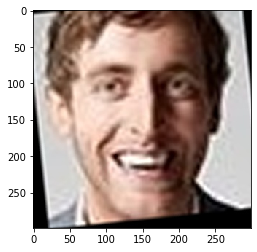

In [10]:
import matplotlib.pyplot as plt

#img_path = metadata[10].image_path()
#sample_img = load_image(img_path)
#plt.imshow(sample_img)

plt.imshow(load_image(metadata[10].image_path()))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [12]:
model=vgg_face()

In [13]:
#loading weights
model.load_weights('vgg_face_weights.h5')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [15]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In the above code, we are removing the last layers (softmax).so that the output of the network is a vector feature representation of the face, called a face embedding. The model is then further trained, via fine-tuning, in order that the Euclidean distance between vectors generated for the same identity are made smaller and the vectors generated for different identities is made larger. 

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [16]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [17]:
embeddings = np.zeros((metadata.shape[0],2622))
for i, m in enumerate(metadata):
    try:
        img_path = m.image_path()
        img = load_image(img_path)
        img = (img / 255.).astype(np.float32)
        img = cv2.resize(img, dsize = (224,224))
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
        embedding_vector = (2622,)
        np.zeros(embedding_vector)
        embeddings[i] = embedding_vector

In [18]:
embeddings[0]

array([ 0.04101016,  0.00751209, -0.00427712, ..., -0.01351489,
       -0.00696024, -0.00447033])

In [19]:
np.shape(embeddings)


(10770, 2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

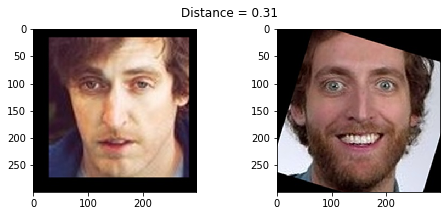

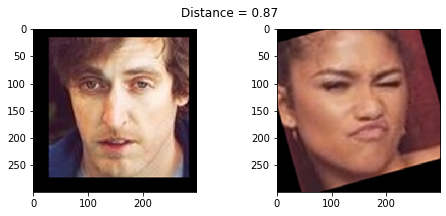

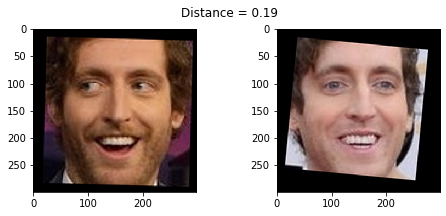

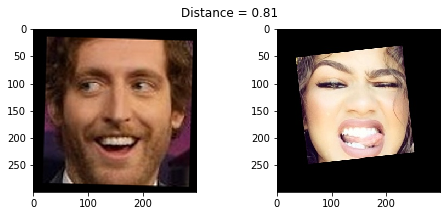

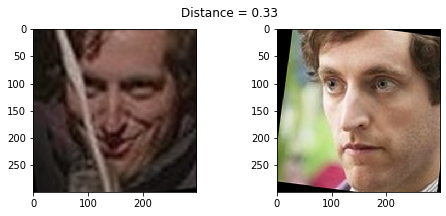

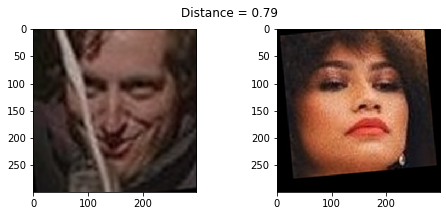

In [21]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

As we can see, similar images have less distance, and different image pair has more distance.

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [22]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [23]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [24]:

targets = np.array([m.name for m in metadata])

y_train = targets[train_idx]
y_test = targets[test_idx]

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Numerical encoding of identities

y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [26]:
y_train.shape,y_test.shape

((9573,), (1197,))

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [27]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train.shape,X_test.shape

((9573, 2622), (1197, 2622))

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [71]:
from sklearn.decomposition import PCA

cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained) 

Covariance Matrix 
%s [[ 1.00010447  0.12374839  0.11224296 ...  0.07327905 -0.12105367
  -0.25480323]
 [ 0.12374839  1.00010447  0.23867988 ... -0.04918695  0.28002792
   0.21276116]
 [ 0.11224296  0.23867988  1.00010447 ... -0.11713448  0.07133634
   0.0397107 ]
 ...
 [ 0.07327905 -0.04918695 -0.11713448 ...  1.00010447 -0.02488372
  -0.09772967]
 [-0.12105367  0.28002792  0.07133634 ... -0.02488372  1.00010447
   0.39885438]
 [-0.25480323  0.21276116  0.0397107  ... -0.09772967  0.39885438
   1.00010447]]


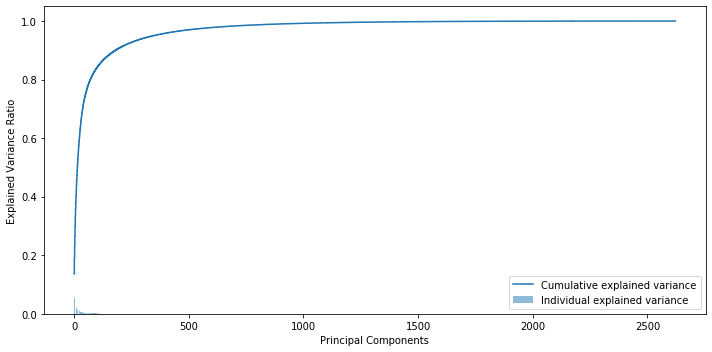

In [72]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


As per the above graph elbow point, Lets run the PCA for n_components=150

In [73]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [76]:
from sklearn.metrics import accuracy_score

#predict
y_pred_train = clf.predict(X_train_pca)
y_pred_test = clf.predict(X_test_pca)
# score
score_train = accuracy_score(y_train, y_pred_train)
score_test = accuracy_score(y_test, y_pred_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=99.979, test=96.742


In [77]:
from sklearn.metrics import classification_report

print('----classification report----')
print(classification_report(y_test, y_pred_test))


----classification report----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       1.00      0.78      0.88         9
           6       1.00      1.00      1.00         7
           7       0.88      1.00      0.93        14
           8       0.93      1.00      0.97        14
           9       1.00      1.00      1.00         9
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00        13
          12       0.91      1.00      0.95        10
          13       0.90      1.00      0.95         9
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        14
          16       0.92      0.92      0.92        

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

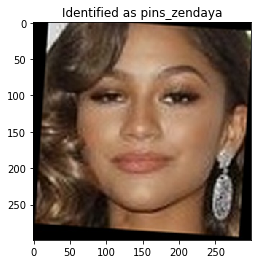

In [78]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict([X_test_pca[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');